In [2]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

In [3]:
result_dir_b = '/home/zabel/projects/MpsABC/results_wf/blast/mspb/'

In [4]:
result_dir_a = '/home/zabel/projects/MpsABC/results_wf/blast/mspa/'

In [5]:
# Read genbank file for mpsa downloaded from BLAST
# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives
# 3404 hits found
t_a = pd.read_csv(result_dir_a+'mpsa_bacteria2.txt', sep='\t', header=None)

In [5]:
print(len(t_a))

5000


In [6]:
# Read genbank file for mpsb downloaded from BLAST
# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives
# 3404 hits found
t_b = pd.read_csv(result_dir_b+'mpsb_bacteria.txt', sep='\t', header=None)

In [7]:
print(len(t_b))

2366


In [8]:
t_a2 = pd.read_csv(result_dir_a+'mpsa_bacteria_2.txt', sep='\t', header=None)

In [9]:
print(len(t_a2))

192


In [10]:
# first 10 entries
t_a.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives']
t_b.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives']
t_a2.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives']
t_a = t_a.append(t_a2)

In [11]:
t_b = t_b.drop_duplicates('subject acc.ver', keep='first')

In [12]:
t_b = t_b.reset_index(drop=True)

In [13]:
print(len(t_a), len(t_b))

5192 2202


In [14]:
ids_a = []
descriptions_a = []
records_a = []
sequences_a = []
for record in SeqIO.parse(open(result_dir_a + 'mpsa_bacteria.gb', 'r'), 'genbank'):
    ids_a.append(record.id)
    descriptions_a.append(record.description)
    records_a.append(record)
    sequences_a.append(str(record.seq))
for record in SeqIO.parse(open(result_dir_a + 'mpsa_bacteria2.gb', 'r'), 'genbank'):
    ids_a.append(record.id)
    descriptions_a.append(record.description)
    records_a.append(record)
    sequences_a.append(str(record.seq))

In [15]:
ids_b= []
descriptions_b = []
records_b = []
sequences_b = []
for record in SeqIO.parse(open(result_dir_b + 'mpsb_bacteria.gb', 'r'), 'genbank'):
    ids_b.append(record.id)
    descriptions_b.append(record.description)
    records_b.append(record)
    sequences_b.append(str(record.seq))

In [16]:
print(len(ids_a), len(ids_b))

5192 2202


In [17]:
species_with_strains_a = [s[s.find("[")+1:s.find("]")] for s in descriptions_a]
species_a = [' '.join(species.split(' ')[:2]) for species in species_with_strains_a]

In [18]:
species_with_strains_b = [s[s.find("[")+1:s.find("]")] for s in descriptions_b]
species_b = [' '.join(species.split(' ')[:2]) for species in species_with_strains_b]

In [19]:
cds_a = []
for i in records_a:
    l = len(cds_a)
    for f in i.features:
        if f.type == 'CDS':
            cds_a.append(f.qualifiers['coded_by'][0])
    if len(i.id) == 8:
        cds_a.append(':-1..-1')
    if l == len(cds_a):
        cds_a.append(':-1..-1')

In [20]:
cds_b = []
for i in records_b:
    l = len(cds_b)
    for f in i.features:
        if f.type == 'CDS':
            cds_b.append(f.qualifiers['coded_by'][0])
    if len(i.id) == 8:
        cds_b.append(':-1..-1')
    if l == len(cds_b):
        cds_b.append(':-1..-1')

In [21]:
cds_mpsa_start = []
cds_mpsa_end = []
for i in cds_a:
    cds = i[i.find(':')+1:]
    start = cds[:cds.find('..')]
    end = cds[cds.find('..')+2:]
    if len(start)>10 or len(end)>10:
        cds_mpsa_start.append(-1)
        cds_mpsa_end.append(-1)
    else:
        if start[0] == '<':
            cds_mpsa_start.append(int(start[1:]))
        else: cds_mpsa_start.append(int(start))
        if (end[0] == '>') and (end[-1] ==')'):
            if(end[-2] ==')'):
                print(end)
                cds_mpsa_end.append(int(end[1:-2]))
            else:
                cds_mpsa_end.append(int(end[1:-1]))
        elif (end[0] == '>') and (end[-1] !=')'):
            cds_mpsa_end.append(int(end[1:]))
        elif (end[0] != '>') and (end[-1] ==')'):
            if (end[-2]==')'):
                cds_mpsa_end.append(int(end[:-2]))
            else:
                cds_mpsa_end.append(int(end[:-1]))
        else: 
            cds_mpsa_end.append(int(end))

In [22]:
cds_mpsb_start = []
cds_mpsb_end = []
for i in cds_b:
    cds = i[i.find(':')+1:]
    start = cds[:cds.find('..')]
    end = cds[cds.find('..')+2:]
    if len(start)>10 or len(end)>10:
        cds_mpsb_start.append(-1)
        cds_mpsb_end.append(-1)
    else:
        if start[0] == '<':
            cds_mpsb_start.append(int(start[1:]))
        else: cds_mpsb_start.append(int(start))
        if (end[0] == '>') and (end[-1] ==')'):
            if(end[-2] ==')'):
                print(end)
                cds_mpsb_end.append(int(end[1:-2]))
            else:
                cds_mpsb_end.append(int(end[1:-1]))
        elif (end[0] == '>') and (end[-1] !=')'):
            cds_mpsb_end.append(int(end[1:]))
        elif (end[0] != '>') and (end[-1] ==')'):
            if (end[-2]==')'):
                cds_mpsb_end.append(int(end[:-2]))
            else:
                cds_mpsb_end.append(int(end[:-1]))
        else: 
            cds_mpsb_end.append(int(end))

In [23]:
t_a[13] = ['' for i in range(len(t_a))]
t_a[14] = ['' for i in range(len(t_a))]
for i, j in enumerate(ids_a):
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 13]=species_a[i]
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 14]=sequences_a[i]
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 15]=descriptions_a[i]
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 16]=cds_mpsa_start[i]
    t_a.loc[t_a[t_a['subject acc.ver']==j].index, 17]=cds_mpsa_end[i]

In [24]:
t_b[13] = ['' for i in range(len(t_b))]
t_b[14] = ['' for i in range(len(t_b))]
for i, j in enumerate(ids_b):
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 13]=species_b[i]
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 14]=sequences_b[i]
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 15]=descriptions_b[i]
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 16]=cds_mpsb_start[i]
    t_b.loc[t_b[t_b['subject acc.ver']==j].index, 17]=cds_mpsb_end[i]

In [25]:
operons_a = []
operons_b = []
for s in list(set(t_b[13].tolist())):
    subset_a = t_a[t_a[13]==s]
    subset_b = t_b[t_b[13]==s]
    a_starts = t_a[t_a[13]==s][16].tolist()
    a_ends = t_a[t_a[13]==s][17].tolist()
    b_starts = t_b[t_b[13]==s][16].tolist()
    b_ends = t_b[t_b[13]==s][17].tolist()
    #print(a_starts, a_ends, b_starts, b_ends)
    for i in range(len(b_starts)):
        l = len(operons_a)
        d1 = []
        d2 = []
        for j in range(len(a_starts)):
            d1.append(abs(a_starts[j] - b_ends[i]))
            d2.append(abs(a_ends[j] - b_starts[i]))
        if len(d1)!=0:
            m1 = np.min(d1)
            m2 = np.min(d2)
            if m1<=m2:
                if m1<=100:
                    operons_a.append(subset_a.iloc[np.argmin(d1)]['subject acc.ver'])
                    operons_b.append(subset_b.iloc[i]['subject acc.ver'])
            else:
                if m2<=100:
                    operons_a.append(subset_a.iloc[np.argmin(d2)]['subject acc.ver'])
                    operons_b.append(subset_b.iloc[i]['subject acc.ver'])
        if l!=len(operons_a):
            break

In [26]:
print(len(operons_a), len(operons_b))

352 352


In [27]:
keep_a = t_a[t_a['subject acc.ver'].isin(operons_a)]
keep_b = t_b[t_b['subject acc.ver'].isin(operons_b)]

In [28]:
keep_a_s = keep_a.sort_values(by=13)

In [29]:
keep_b_s = keep_b.sort_values(by=13)

In [32]:
keep_a_s[13].tolist()

['Acidibacillus ferrooxidans',
 'Acidibacillus sulfuroxidans',
 'Acidiphilium sp.',
 'Acidithiobacillus caldus',
 'Acidithiobacillus ferrivorans',
 'Acidithiobacillus ferrooxidans',
 'Acidithiobacillus sp.',
 'Acidithiobacillus thiooxidans',
 'Acidobacteria bacterium',
 'Acidovorax sp.',
 'Aequorivita antarctica',
 'Aequorivita lipolytica',
 'Aequorivita sp.',
 'Aeribacillus pallidus',
 'Aestuariispira insulae',
 'Afipia felis',
 'Alicycliphilus denitrificans',
 'Alicyclobacillus acidocaldarius',
 'Alicyclobacillus hesperidum',
 'Alicyclobacillus montanus',
 'Alicyclobacillus vulcanalis',
 'Alphaproteobacteria bacterium',
 'Anoxybacillus sp.',
 'Aquifex aeolicus',
 'Arachidicoccus rhizosphaerae',
 'Archangium gephyra',
 'Archangium sp.',
 'Azonexus fungiphilus',
 'Azospirillum oryzae',
 'Azotobacter chroococcum',
 'Bacillus anthracis',
 'Bacillus atrophaeus',
 'Bacillus bataviensis',
 'Bacillus cereus',
 'Bacillus cytotoxicus',
 'Bacillus glycinifermentans',
 'Bacillus halotolerans',
 

In [295]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
outfile = '/share/home/zabel/final_blast_hits/' + 'mpsa_bacteria_hits_ab.fasta'
# keep only records which are in final list
keep_records = []
for i in range(len(keep_a_s)):
    r = SeqRecord(Seq(keep_a_s.iloc[i][14]), 
                 id=keep_a_s.iloc[i][13],
                 description='')
    keep_records.append(r)
with open (outfile, 'w') as output_handle:
    SeqIO.write(keep_records, output_handle, 'fasta')

In [296]:
outfile = '/share/home/zabel/final_blast_hits/' + 'mpsb_bacteria_hits_ab.fasta'
# keep only records which are in final list
keep_records = []
for i in range(len(keep_b_s)):
    r = SeqRecord(Seq(keep_b_s.iloc[i][14]), 
                 id=keep_b_s.iloc[i][13],
                 description='')
    keep_records.append(r)
with open (outfile, 'w') as output_handle:
    SeqIO.write(keep_records, output_handle, 'fasta')

Text(0.5, 1.0, 'Scatterplot')

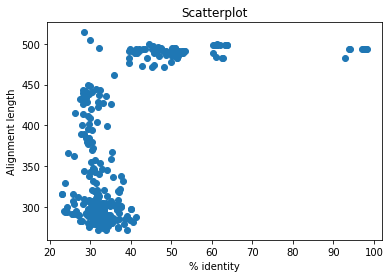

In [289]:
f = plt.figure()
plt.scatter(list(keep_a['% identity']), list(keep_a['alignment length']))
plt.xlabel('% identity')
plt.ylabel('Alignment length')
plt.title('Scatterplot')

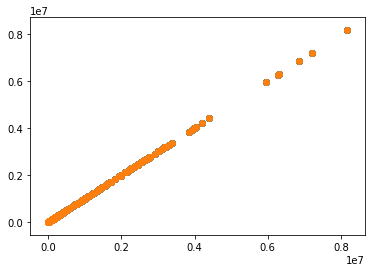

In [290]:
f = plt.figure()
for i in range(len(keep_a)):
    plt.scatter(keep_a_s[16].tolist(), keep_b_s[16].tolist())
